In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,sys

In [3]:
closed = pd.read_csv("ClosedAverage.csv", \
            names=['time', 'resp', 'proxy', 'router', 'originA', 'originB'])
print("closed has", len(closed.index), "rows")
closed[:5]

closed has 9957 rows


,time,resp,proxy,router,originA,originB
0,10.036511,0.166524,0.637821,0.155142,0.924056,0.749871
1,20.075607,0.178683,0.614420,0.137205,0.981474,0.679607
2,30.141002,0.255604,0.620062,0.136784,0.980300,0.691470
3,40.216904,0.236859,0.595849,0.130627,0.986105,0.630321
4,50.229666,0.205837,0.577142,0.127432,0.989218,0.612193


In [4]:
closed[9900:9905]

,time,resp,proxy,router,originA,originB
9900,99439.909293,0.213893,0.568720,0.131192,0.984616,0.656018
9901,99449.946263,0.264462,0.568718,0.131192,0.984618,0.656012
9902,99459.954034,0.243375,0.568715,0.131192,0.984619,0.656008
9903,99469.982108,0.191640,0.568709,0.131190,0.984621,0.655995
9904,99479.994366,0.205872,0.568708,0.131188,0.984623,0.655983


Now, lets plot the response time and the utilization for one component

Mean response =  0.210677683845


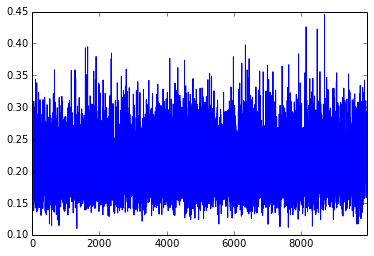

In [5]:
import numpy as np
closed['resp'].plot()
print("Mean response = ", np.mean(closed['resp']))

Router Utilization


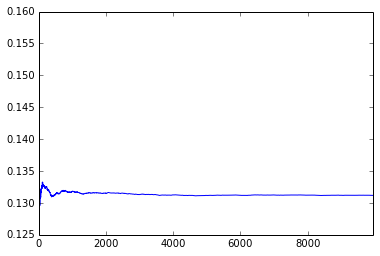

In [51]:
print("Router Utilization")
closed['router'].plot()

It's clear there's a transient for the first ~40,000 seconds (recall that we're looking at the data divided into 10 second averages)

Proxy Utilization


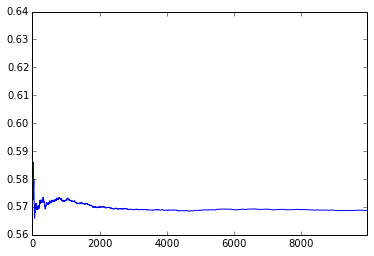

In [52]:
print("Proxy Utilization")
closed['proxy'].plot()

OriginA Utilization


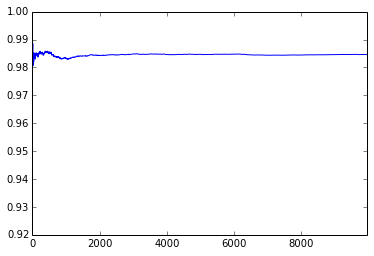

In [53]:
print("OriginA Utilization")
closed['originA'].plot()

OriginB Utilization


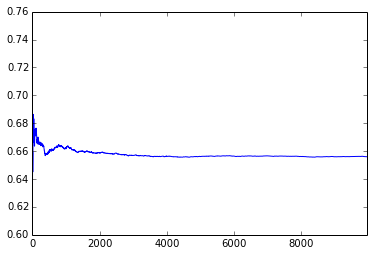

In [54]:
print("OriginB Utilization")
closed['originB'].plot()

Total observations =  9957


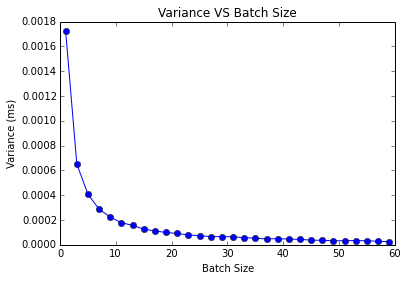

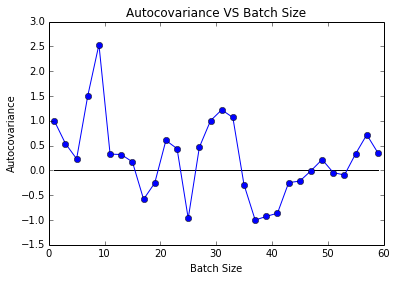

The transient period appears to stop around 46000 seconds
This can be seen visually in the utilization plots as they level out around this time 
Futhermore the autocovariance of the batch of means drops to less than 1% of the original value at this time
The batch size is thus 46 (the size which gets to the end of the transient period)


In [55]:
# Problem 1 parts 1&2

# Run for long time 
# N observations
# Divide up into batches
# m batches size n each so m = N/n
# Compute batch mean (xi)
# Compute var of batch means as function of batch size (X is overall mean)
# Var(x) = (1/(m-1))(xi-X)2
# Plot variance versus size n
# When n starts decreasing, have transient

#closedAll = pd.read_csv("OmnetClosed.csv", \
#            names=['time', 'resp', 'proxy', 'router', 'originA', 'originB'])

#total_rows = len(closedAll.index)
#print("Total observations = ", total_rows)
import numpy as np
from numpy import mean
import statistics

def autocovariance(Xi):
    NN = np.size(Xi)
    k = 5
    Xs = np.average(Xi)
    autoCov = 0
    for i in np.arange(0, NN-k):
        autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
    return (1/(NN-1))*autoCov

total_rows = len(closed.index)
print("Total observations = ", total_rows)
# variance1 = []
autocov = []
variance2 = []
overall_mean = mean(closed['resp'])

batch_sizes = [x for x in range(1,61,2)]

for n in batch_sizes:
    m = int(total_rows/n)

    batch_means = []

    for ii in range(0,total_rows,n):
        #print(i)
        m_temp = mean(closed['resp'][ii:n+ii])
        batch_means.append(m_temp)
    
    autocov.append(autocovariance(batch_means))
    variance2.append(statistics.variance(batch_means))
    
#Plot variance vs batch size (n)
# line0, = plt.plot(batch_sizes, variance1, 'bo-')
line0, = plt.plot(batch_sizes, variance2, 'o-')
plt.xlabel('Batch Size')
plt.ylabel('Variance (ms)')
plt.title("Variance VS Batch Size")
plt.show()

line0, = plt.plot(batch_sizes, [0 for x in autocov], 'k-')
line1, = plt.plot(batch_sizes, [x/autocov[0] for x in autocov], 'bo-')
plt.xlabel('Batch Size')
plt.ylabel('Autocovariance')
plt.title("Autocovariance VS Batch Size")
plt.show()

#print([x/autocov[0] for x in autocov])


print("The transient period appears to stop around 46000 seconds")
print("This can be seen visually in the utilization plots as they level out around this time ")
print("Futhermore the autocovariance of the batch of means drops to less than 1% of the original value at this time")
print("The batch size is thus 46 (the size which gets to the end of the transient period)")
    

In [56]:
import scipy
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    # return [m, [m-h, m+h]]
    return [m, h]



In [57]:
#Problem 1 part 3
batch_size = 46

proxy_stats = []
router_stats = []
originA_stats = []
originB_stats = []

for ii in range(0, total_rows, batch_size):
    proxy_stats.append(mean(closed['proxy'][ii:n+ii]))
    router_stats.append(mean(closed['router'][ii:n+ii]))
    originA_stats.append(mean(closed['originA'][ii:n+ii]))
    originB_stats.append(mean(closed['originB'][ii:n+ii]))
    
proxy_util = mean_confidence_interval(proxy_stats)
router_util = mean_confidence_interval(router_stats)
originA_util = mean_confidence_interval(originA_stats)
originB_util = mean_confidence_interval(originB_stats)

print("Proxy mean utilization (%) = ", proxy_util[0], "Proxy 95% confidence +- =", proxy_util[1])
print("Router mean utilization (%) = ", router_util[0], "Router 95% confidence +- =", router_util[1])
print("OriginA mean utilization (%) = ", originA_util[0], "OriginA 95% confidence +- =", originA_util[1])
print("OriginB mean utilization (%) = ", originB_util[0], "OriginB 95% confidence +- =", originB_util[1])

Proxy mean utilization (%) =  0.569529193517 Proxy 95% confidence +- = 0.00017563621038
Router mean utilization (%) =  0.131328225775 Router 95% confidence +- = 3.26638020721e-05
OriginA mean utilization (%) =  0.984502657113 OriginA 95% confidence +- = 4.91803572912e-05
OriginB mean utilization (%) =  0.657499219121 OriginB 95% confidence +- = 0.000353074808017


In [58]:
#Problem 2
#Report last 5 measurements:
#49999.897656465426,0.039093270671,0.577865,0.133549,0.999779,0.667094
#49999.929923779502,0.461592592368,0.577865,0.133549,0.999778,0.667094
#49999.949150078496,0.068900355486,0.577866,0.133549,0.999781,0.667096
#49999.976601088507,0.005503812923,0.577865,0.133549,0.999781,0.667095
#49999.994374383683,0.349631026105,0.577865,0.133549,0.99978,0.667095

import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

print("Last 5 measurements: ")
print('time', 'resp', 'proxy', 'router', 'originA', 'originB')
print('''49999.897656465426,0.039093270671,0.577865,0.133549,0.999779,0.667094
49999.929923779502,0.461592592368,0.577865,0.133549,0.999778,0.667094
49999.949150078496,0.068900355486,0.577866,0.133549,0.999781,0.667096
49999.976601088507,0.005503812923,0.577865,0.133549,0.999781,0.667095
49999.994374383683,0.349631026105,0.577865,0.133549,0.99978,0.667095''')

#Using R (or some other tool), make a plot of the response time as a function of the number of jobs in the system.
#I'm averaging the last 10000 response times
avg_response = []
response_confint = []
for ii in range(26,37):
    file = "OmnetClosed" + str(ii) + ".csv"
    TehCSV = pd.read_csv(file, \
            names=['time', 'resp', 'proxy', 'router', 'originA', 'originB'])
    last_N = TehCSV['resp'][-10000:]
    #res[0]=mean, 1=confint
    res = mean_confidence_interval(last_N)
    avg_response.append(res[0])
    response_confint.append(res[1])
    
#print("Avg response = ", avg_response)
#print("Confint = ", response_confint)


Last 5 measurements: 
time resp proxy router originA originB
49999.897656465426,0.039093270671,0.577865,0.133549,0.999779,0.667094
49999.929923779502,0.461592592368,0.577865,0.133549,0.999778,0.667094
49999.949150078496,0.068900355486,0.577866,0.133549,0.999781,0.667096
49999.976601088507,0.005503812923,0.577865,0.133549,0.999781,0.667095
49999.994374383683,0.349631026105,0.577865,0.133549,0.99978,0.667095


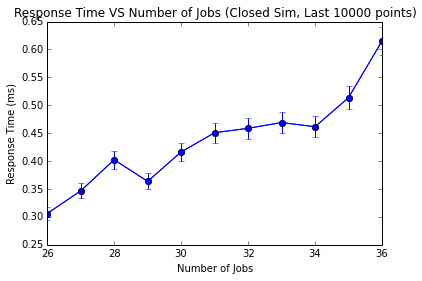

95% confidence intervals or last 10000 points shown on plot


In [59]:
x = []
for jj in range(26,37):
    x.append(jj)
line0, = plt.plot(x, avg_response, 'bo-')
plt.errorbar(x, avg_response, 
  yerr=response_confint, fmt='bo-')

#title and axis labels
plt.xlabel('Number of Jobs')
plt.ylabel('Response Time (ms)')
plt.title("Response Time VS Number of Jobs (Closed Sim, Last 10000 points)")
plt.show()
print("95% confidence intervals or last 10000 points shown on plot")

In [60]:
#Problem 3
print("15 ms interarrivaltime gets very close to 1, here are the last 5 measurements:")
print('''49999.885753074046,0.014867338833,0.833873,0.183423,0.999982,0.99984
49999.90796650579,0.024744846576,0.833873,0.183422,0.999981,0.99984
49999.931279015363,60.418726752998,0.833873,0.183422,0.99998,0.999839
49999.934273498183,0.03122815644,0.833873,0.183422,0.99998,0.999839
49999.98892562328,0.006565631384,0.833872,0.183422,0.999983,0.99984
''')

15 ms interarrivaltime gets very close to 1, here are the last 5 measurements:
49999.885753074046,0.014867338833,0.833873,0.183423,0.999982,0.99984
49999.90796650579,0.024744846576,0.833873,0.183422,0.999981,0.99984
49999.931279015363,60.418726752998,0.833873,0.183422,0.99998,0.999839
49999.934273498183,0.03122815644,0.833873,0.183422,0.99998,0.999839
49999.98892562328,0.006565631384,0.833872,0.183422,0.999983,0.99984



In [61]:
#Problem 4

avg_response_4 = []
proxy = []
router = []
originA = []
originB = []
for ii in range(0,14):
    if ii<14:
        file = "OmnetOpen" + str(ii+10) + "_" + str(ii*2+70) + ".csv"
        print(file)
        TehCSV = pd.read_csv(file, \
                names=['time', 'resp', 'proxy', 'router', 'originA', 'originB'])
        avg_response_4.append(mean(TehCSV['resp'][-10000:]))
        proxy.append(mean(TehCSV['proxy'][-10000:]))
        router.append(mean(TehCSV['router'][-10000:]))
        originA.append(mean(TehCSV['originA'][-10000:]))
        originB.append(mean(TehCSV['originB'][-10000:]))



OmnetOpen10_70.csv
OmnetOpen11_72.csv
OmnetOpen12_74.csv
OmnetOpen13_76.csv
OmnetOpen14_78.csv
OmnetOpen15_80.csv
OmnetOpen16_82.csv
OmnetOpen17_84.csv
OmnetOpen18_86.csv
OmnetOpen19_88.csv
OmnetOpen20_90.csv
OmnetOpen21_92.csv
OmnetOpen22_94.csv
OmnetOpen23_96.csv


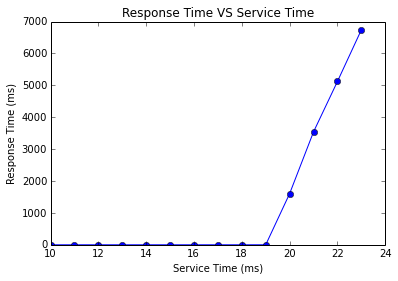

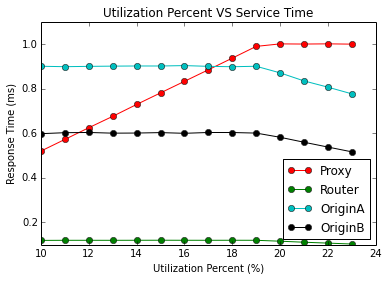

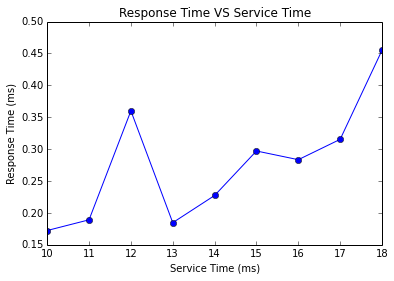

I used the open simulation as it was unclear which to use
10ms service time with 70% hit rate is the best configuration
Looking at the above plots the proxy utilization climbs as the service time increases
At around 19 ms service time the response time spikes as the proxy reaches 100% utilization


In [62]:

x = []
for jj in range(0,14):
    if ii<24:
        x.append(jj+10)
        
#print(len(x), len(proxy))
#print(x)
#print(avg_response_4)
        
line0, = plt.plot(x, avg_response_4, 'bo-')
plt.xlabel('Service Time (ms)')
plt.ylabel('Response Time (ms)')
plt.title("Response Time VS Service Time")
plt.show()

line1, = plt.plot(x, proxy, 'ro-')
line2, = plt.plot(x, router, 'go-')
line3, = plt.plot(x, originA, 'co-')
line4, = plt.plot(x, originB, 'ko-')
plt.legend([line1, line2, line3, line4], 
  ['Proxy', 'Router', 'OriginA', 'OriginB'], loc=4)
plt.xlabel('Utilization Percent (%)')
plt.ylabel('Response Time (ms)')
plt.title("Utilization Percent VS Service Time")
plt.show()

line0, = plt.plot(x[0:9], avg_response_4[0:9], 'bo-')
plt.xlabel('Service Time (ms)')
plt.ylabel('Response Time (ms)')
plt.title("Response Time VS Service Time")
plt.show()

print("I used the open simulation as it was unclear which to use")
print("10ms service time with 70% hit rate is the best configuration")
print("Looking at the above plots the proxy utilization climbs as the service time increases")
print("At around 19 ms service time the response time spikes as the proxy reaches 100% utilization")

